In [216]:
# Test task for Kuznech Team. Completed and tested. 
# Script 2

# import some useful libraries
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import gzip
import os

In [187]:
# dances with tambourines
file_path = 'checkpoints/transfer_values'
with open(file_path, mode='rb') as file:
    transfer_values = np.load(file)

In [188]:
# dances with tambourines
file_path122 = 'checkpoints/train_labels'
with open(file_path122, mode='rb') as file:
    train_labels = np.load(file)

In [189]:
# dances with tambourines
file_path_train_images = 'checkpoints/train_images'
with open(file_path_train_images, mode='rb') as file:
    train_images = np.load(file)

In [190]:
# dances with tambourines
file_path_test_images = 'checkpoints/test_images'
with open(file_path_test_images, mode='rb') as file:
    test_images = np.load(file)

In [191]:
# dances with tambourines
file_path_test_labels = 'checkpoints/test_labels'
with open(file_path_test_labels, mode='rb') as file:
    test_labels = np.load(file)

In [254]:
# we need these variables for plotting images
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)

# these varibles need for construction tensorflow graph
num_classes = 10
input_size = 128
latent_layer_size = 48 # we can change this value to bigger number e.g. 128, btw we could achieve better performance

In [195]:
# convert from 10 dim vector to single number that shows us true class of image
cls_true = np.argmax(train_labels, axis=1)

In [196]:
# construction tensorflow graph
x = tf.placeholder(tf.float32, shape=[None, input_size], name='x')

In [197]:
# construction tensorflow graph
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')

In [198]:
# construction tensorflow graph
y_true_cls = tf.argmax(y_true, dimension=1)

In [199]:
# function for random initialization weights and biases
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [200]:
# here we using sigmoid activation function, that returns all the values between 0 and 1. 
def new_sigmoid_layer(input,
                     num_inputs,
                     num_outputs):
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    layer = tf.nn.sigmoid(tf.matmul(input, weights))
    
    return layer

In [201]:
# construction tensorflow graph
layer_fc1 = new_sigmoid_layer(input=x,
                              num_inputs=input_size,
                              num_outputs=latent_layer_size)

In [202]:
# construction tensorflow graph
layer_fc2 = new_sigmoid_layer(input=layer_fc1,
                              num_inputs=latent_layer_size,
                              num_outputs=num_classes)

In [203]:
# construction tensorflow graph
y_pred = tf.nn.softmax(layer_fc2)

In [204]:
# construction tensorflow graph
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [205]:
# construction tensorflow graph
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)

In [206]:
# construction tensorflow graph
cost = tf.reduce_mean(cross_entropy)

In [207]:
# construction tensorflow graph
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [208]:
# construction tensorflow graph
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [209]:
# construction tensorflow graph
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [210]:
# construction tensorflow graph
session = tf.Session()

In [211]:
# construction tensorflow graph. here we run initialization of all the variables in tensorflow 
session.run(tf.initialize_all_variables())

In [212]:
# during feedforward propagation we use optimization with mini bathces
train_batch_size = 64

In [223]:
# function that randomly retrieve data for feeding our tf graph
def random_batch():
    num_values = len(transfer_values)
    idx = np.random.choice(num_values,
                           train_batch_size,
                           replace=False)
    x_batch = transfer_values[idx, :]
    y_batch = train_labels[idx, :]
    
    return x_batch, y_batch

In [224]:
# function for optimization our second model

total_iterations = 0

def optimize(num_iterations):
    global total_iterations
    start_time = time.time()
    for i in range(total_iterations, total_iterations+num_iterations):
        x_batch, y_true_batch = random_batch()
        # x_batch = transfer_values
        # y_true_batch = labels
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train)
        
        if i%100 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            msg = "Optimization iteration: {0:>6}, Training Accuracy: {1:>6.1%}"
            print(msg.format(i + 1, acc))
            
    total_iterations += num_iterations
    end_time = time.time()
    time_dif = end_time - start_time
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [225]:
# run optimization.
optimize(num_iterations=3000)

Optimization iteration:      1, Training Accuracy:  18.8%
Optimization iteration:    101, Training Accuracy:  45.3%
Optimization iteration:    201, Training Accuracy:  70.3%
Optimization iteration:    301, Training Accuracy:  85.9%
Optimization iteration:    401, Training Accuracy:  87.5%
Optimization iteration:    501, Training Accuracy:  90.6%
Optimization iteration:    601, Training Accuracy:  93.8%
Optimization iteration:    701, Training Accuracy:  85.9%
Optimization iteration:    801, Training Accuracy:  82.8%
Optimization iteration:    901, Training Accuracy:  93.8%
Optimization iteration:   1001, Training Accuracy:  90.6%
Optimization iteration:   1101, Training Accuracy:  90.6%
Optimization iteration:   1201, Training Accuracy:  89.1%
Optimization iteration:   1301, Training Accuracy:  92.2%
Optimization iteration:   1401, Training Accuracy:  89.1%
Optimization iteration:   1501, Training Accuracy:  93.8%
Optimization iteration:   1601, Training Accuracy:  90.6%
Optimization i

In [226]:
# assign saver for further saving second trained model
saver = tf.train.Saver()

In [227]:
# location for saving
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = save_dir + 'sigmoid_retrain'

In [228]:
# run script for saving
saver.save(sess=session, save_path=save_path)

'checkpoints/sigmoid_retrain'

In [229]:
# this function is used for retrieving data from latent. We gonna process all the images from training set
# and save them into numpy file
def extract_latent_layer(layer):
    images = transfer_values
    num_images = len(images)
    result = np.zeros(shape=[num_images, latent_layer_size], dtype = np.float32)
    i = 0
    
    while i < num_images:
        image = images[i, :]
        feed_dict = {x: [image]}
        value = session.run(layer, feed_dict=feed_dict)
        value = np.squeeze(value)
        result[i] = value
        i = i + 1
    
    file_path = save_dir + 'latent_layer_values'
    with open(file_path, mode='wb') as file:
        np.save(file, result)

In [230]:
# usually it takes couple of minutes for entire training set
extract_latent_layer(layer_fc1)

In [231]:
# load numpy file with latent layer
file_path_latent = save_dir + 'latent_layer_values'
with open(file_path_latent, mode='rb') as file:
    latent_layer_values = np.load(file)

In [232]:
# finallly, we get binaries
binary_signatures = np.round(latent_layer_values)

In [233]:
binary_signatures.shape

(55000, 48)

In [234]:
# This is function for computing hamming distances for query image
def compute_hamming_distance(input_vector):
    num_images = len(binary_signatures)
    distance = np.zeros(shape=[num_images, 1], dtype=np.int)
    
    for i in range(0, num_images - 1):
        image = binary_signatures[i, :]
        z = 0
        for j in range(0, len(image)):
            if input_vector[j] != image[j]:
                z += 1
            distance[i] = z
            
    return distance

In [235]:
# just checking if everything works OK
distances = compute_hamming_distance(binary_signatures[0, :])

In [236]:
# we need to squeeze initial array with distances, cause we need just single array, NOT "arrays in array"
dist = np.squeeze(distances)

In [239]:
# just check some distances
dist[0:10]

array([ 0, 16, 24, 13, 21,  1, 20, 20, 17,  4])

In [240]:
# just check classes of the images
np.argmax(train_labels[0:10], axis=1)

array([8, 2, 1, 5, 5, 8, 5, 0, 2, 8])

In [241]:
# here we compute k nearest neighbors. I used np.argsort this time, however this is not best solution, cause its sort
# through all the values in array and for large data sets could be computationally expensive.
# Further we can replace np.argsort with np.argpartition. But in my system argpartition behave quite buggy

def compute_nearest_neighbors(distances, k):
    num_labels = len(distances)
    dist = distances
    idx = np.argsort(dist)
    idx = idx[0:k]
    return idx
            

In [246]:
# just check if everything works OK
r = compute_nearest_neighbors(distances=dist, k=9)

In [247]:
# just check if everything works OK
r

array([    0,  7674,  8446,  8453,  8644,  9783, 10774, 19232, 21307])

In [248]:
# just check if everything works OK
dist[r]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [251]:
# just check if everything works OK
n = train_labels[r]

In [255]:
# function for plotting images
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

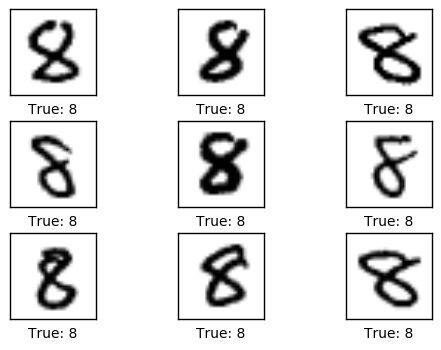

In [256]:
# just check if everything works OK
plot_images(train_images[r], cls_true[r])

In [ ]:
# As you can see Taiwanese comrads were right, despite tricky explanation, their algorithm works well